**INTRODUCCION**

 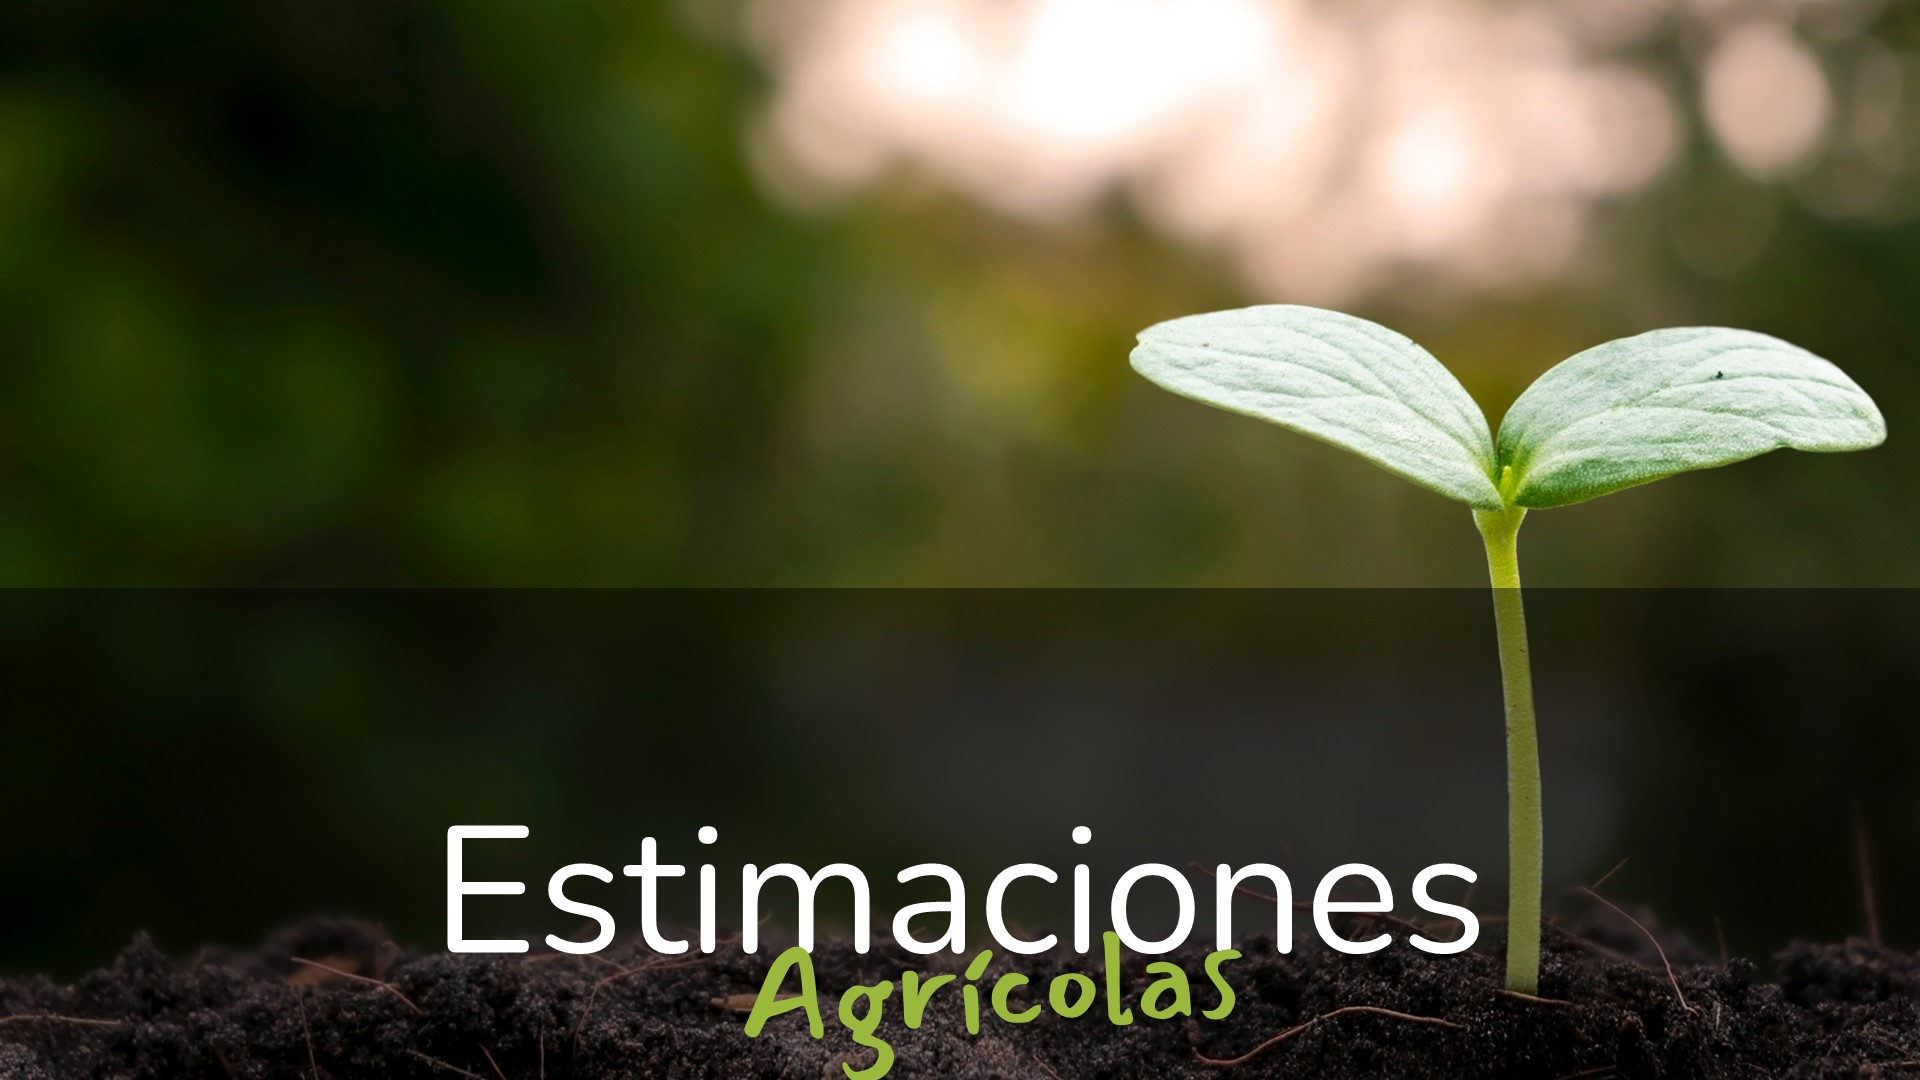



 Estimaciones Agrícolas es un documento que continene información relacionada con la distribución zonal de semillas en el campo argentino. Este análisis nos permitirá identificar potenciales territorios para siembra/inversion.


 Objetivo:
 1) Conocer las plantaciones más efectivas.
 2) Identificar futuras inversiones.
 3) Detectar localidades en territorio argentino para la siembra.

 A quien está destinado:
 1) Colaboradores administrativos
 2) Jefes, Gerencia General, quien toma decisiones

 Hipótesis:
 1) La Superficie Sembrada en este análisis no garantiza efectividad en la producción. Lo que se debe analizar también es el manejo de la tierra como un factor mucho mas relevante, ya que cada cierta cantidad de años se debe renovar.
 Cómo verificarlo: Comparar las superficies sembradas y cosechadas con la producción total mediante un gráfico de dispersión. Podría aplicarse un análisis de eficiencia para evaluar qué productores logran mejores rendimientos por hectárea.



**BIBLIOTECA**
 Drive- MyDrive
https://datos.gob.ar/dataset  

**VARIABLES**
 Media/Mediana/Moda
 Dispersión_ Varianza, desviación estandar
 Cuantiles y percentiles.


**MEDIDAS DESCRIPTIVAS**

**DISTRIBUCION DE DATOS**



**Contexto Comercial**
Este modelo puede ser utilizado para empresas de la agroindustria, tanto para la plantaciòn de semillas a utilizar para futuras inversiones, como tambièn identificar terrenos para potenciar la cosecha en territorio argentino. Lo cual terminarà en un gran contexto pues se ampliarà la mano de obra generando ofertas locales, y asì atraer mas inversiones al paìs de origen.

**Contexto Analìtico:**
Se utilizarà un modelo de regresiòn para predecir futuras inversiones para el tipo de semillas a cultivar.

In [ ]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as mticker





In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
pd = pd.read_excel('/content/drive/MyDrive/Data Science-TP/Estimaciones Agricolas TPDATASCI.xlsx')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd = pd.read_excel('/content/drive/MyDrive/Data Science-TP/Estimaciones Agricolas TPDATASCI.xlsx')


# En este grafico podemos ver un listado de todo el dataset con el que vamos a trabajar nuestro anàlisis de proyecciones agrìcolas. Que son las proyecciones agrìcolas? Este es un dataset bajado de una web del estado pùblica y con datos modificados, tomando en cuenta los ùltimos 2 años de varios municipios del territorio argentino, donde analizamos los cultivos mas comunes, por ejemplo Soja, Ajo, Cebada... entre otros.
Detectar zona de cultivo/ tipo de cultivo/ origen de inversiones nos permitirà ver en dònde estamos trabajando actualmente y què puntos podemos mejorar para atraer mas inversores en zonas de menor inversiòn, previendo los riesgos que conlleva cada localìa y tambien por supuesto las ganancias que estas generaràn.

In [ ]:
pd.head(300)

,cultivo_nombre,municipio_nombre,superficie_sembrada,superficie_cosechada,Origen_Empresa,Productor_nombre,Inversion_moneda,Inversion_divisa USD,produccion en toneladas,rendimiento USD,roi_porcent,latitud,longitud,year_fecha
0,Ajo,25 de Mayo,3,3,Local,Estado Argentino,ARS,79.908676,10,3333,0.095239,-35.4432,-60.1721,2020-01-01
1,Ajo,Adolfo Gonzales Chaves,15,15,Extranjera,Wo Jinn,USD,5000.000000,82,5467,0.010000,-38.0481,-60.0744,2020-01-01
2,Ajo,Alberti,5,5,Extranjera,Wo Jinn,USD,5000.000000,7,1400,0.072000,-35.0279,-60.2851,2020-01-01
3,Ajo,Almirante Brown,2,2,Local,Estado Argentino,ARS,79.908676,8,4000,0.094286,-34.8116,-58.2619,2020-01-01
4,Ajo,Arrecifes,6,6,Local,Estado Argentino,ARS,79.908676,15,2500,0.096429,-34.0587,-60.1195,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Cebada cervecera,Necochea,1700,1600,Local,Estado Argentino,ARS,79.908676,2400,1500,0.097857,-38.5500,-58.7333,2020-01-01
296,Cebada cervecera,Olavarria,3000,1350,Local,Estado Argentino,ARS,79.908676,2025,1500,0.097857,-36.8954,-60.3145,2020-01-01
297,Cebada cervecera,Patagones,2000,1500,Local,Estado Argentino,ARS,79.908676,975,650,0.099071,-40.7963,-62.9756,2020-01-01
298,Cebada cervecera,Pehuajo,4000,4000,Local,Estado Argentino,ARS,79.908676,7200,1800,0.097429,-35.8109,-61.9026,2020-01-01


# Reducimos la planilla en 5 columnas para poder ver los cultivos/ Municipios y poder visualizar el origen de las inversiones por empresa. Estas son Locales (es decir de Argentina) y Extranjeras.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
selected_columns = ['cultivo_nombre', 'municipio_nombre', 'superficie_cosechada', 'Origen_Empresa', 'Inversion_divisa USD']
excel_data = pd.read_excel('/content/drive/MyDrive/Data Science-TP/Estimaciones Agricolas TPDATASCI.xlsx')
df = pd.DataFrame(excel_data, columns=selected_columns)
df.loc[2:3000, selected_columns]

,cultivo_nombre,municipio_nombre,superficie_cosechada,Origen_Empresa,Inversion_divisa USD
2,Ajo,Alberti,5,Extranjera,5000.000000
3,Ajo,Almirante Brown,2,Local,79.908676
4,Ajo,Arrecifes,6,Local,79.908676
5,Ajo,Ayacucho,5,Local,79.908676
6,Ajo,Bahia Blanca,10,Local,79.908676
...,...,...,...,...,...
2996,Girasol,25 de Mayo,19000,Local,79.908676
2997,Girasol,9 de Julio,22000,Extranjera,5000.000000
2998,Girasol,Adolfo Alsina,5000,Extranjera,5000.000000
2999,Girasol,Adolfo Gonzales Chaves,2250,Extranjera,5000.000000


# Nos interesa ver la media y promedio del total de la superficie cosechada, junto a la inversiòn. Gracias a estos datos podemos detectar las zonas de mayor impacto en inversiones con la moneda dolar estadounidense. En cuanto a la superficie, nos permite detectar el radio de municipios donde podemos concentrar mejores inversiones y trabajar en pos de ello.
Esto lo veremos mas abajo en los gràficos de Histogramas.

In [ ]:
df.describe()

,superficie_cosechada,Inversion_divisa USD
count,49830.000000,49830.000000
mean,11229.157977,858.745306
std,25053.162067,1795.638586
min,0.000000,79.908676
25%,228.000000,79.908676
50%,1600.000000,79.908676
75%,9500.000000,79.908676
max,349600.000000,5000.000000


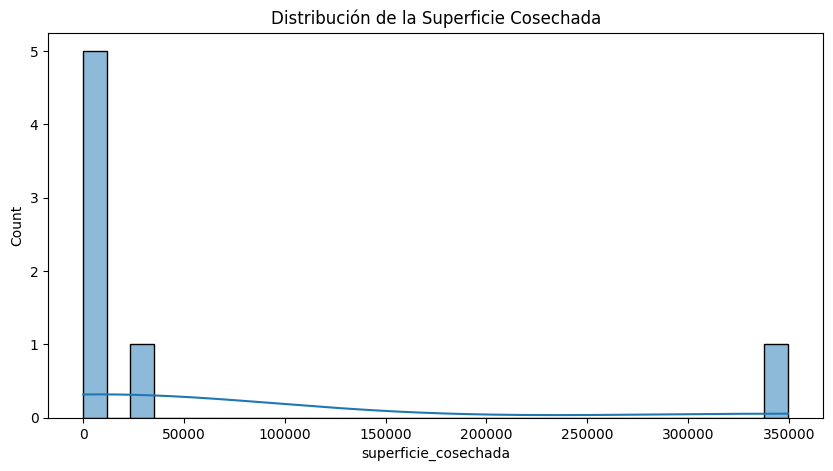

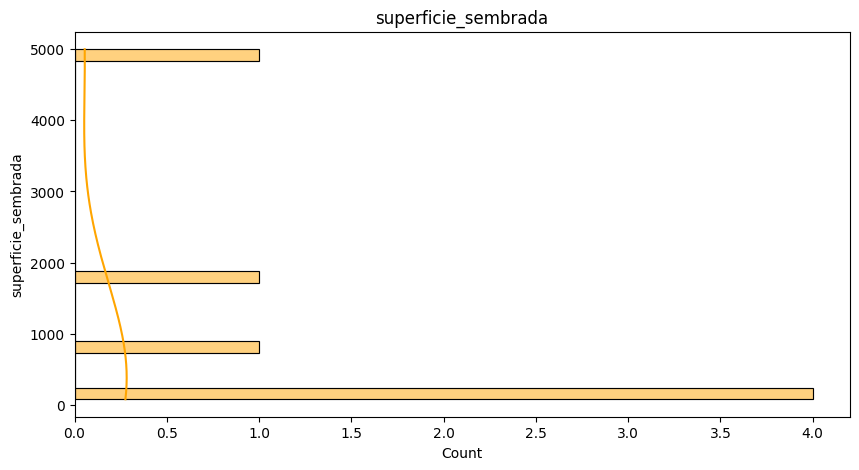

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'superficie_cosechada': [11229.157977, 25053.162067, 0.0, 228.0, 1600.0, 9500.0, 349600.0],
    'superficie_sembrada': [858.745306, 1795.638586, 79.908676, 79.908676, 79.908676, 79.908676, 5000.0]
    }

df = pd.DataFrame(data, index=['mean', 'std', 'min', '25%', '50%', '75%', 'max'])

# Histograma de la superficie cosechada
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='superficie_cosechada', bins=30, kde=True)
plt.title('Distribución de la Superficie Cosechada')
plt.show()

# Histograma de la superficie sembrada
plt.figure(figsize=(10, 5))
sns.histplot(data=df, y='superficie_sembrada', bins=30, kde=True, color='orange')
plt.title('superficie_sembrada')
plt.show()

In [ ]:
# Medidas descriptivas para la columna 'superficie_cosechada'
mean_superficie_cosechada = df['superficie_cosechada'].mean()
median_superficie_cosechada = df['superficie_cosechada'].median()
mode_superficie_cosechada = df['superficie_cosechada'].mode()[0]  # Primer valor de la moda

# Medidas de dispersión
std_superficie_cosechada = df['superficie_cosechada'].std()#desviacion estandar

var_superficie_cosechada = df['superficie_cosechada'].var()#varianza

print(f"Media: {mean_superficie_cosechada}")
print(f"Mediana: {median_superficie_cosechada}")
print(f"Moda: {mode_superficie_cosechada}")
print(f"Desviación Estándar: {std_superficie_cosechada}")
print(f"Varianza: {var_superficie_cosechada}")

Media: 56744.331434857144
Mediana: 9500.0
Moda: 0.0
Desviación Estándar: 129439.3956339577
Varianza: 16754557142.084227


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'superficie_cosechada': [11229.157977, 25053.162067, 0.0, 228.0, 1600.0, 9500.0, 349600.0],
    'superficie_sembrada': [858.745306, 1795.638586, 79.908676, 79.908676, 79.908676, 79.908676, 5000.0],
    'Inversion_divisa_USD': [100, 200, 300, 400, 500, 600, 700]
}

df = pd.DataFrame(data, index=['mean', 'std', 'min', '25%', '50%', '75%', 'max'])

mean_Inversion_divisa_USD = df['Inversion_divisa_USD'].mean()

In [ ]:
# Medidas descriptivas para la columna 'superficie_sembrada' PRODUCTOR NOMBRE-
# INVERSION DIVISA- RENDIMIENTO USD

mean_Inversion_divisa_USD = df['Inversion_divisa_USD'].mean()
median_Inversion_divisa_USD = df['Inversion_divisa_USD'].median()
mode_Inversion_divisa_USD = df['Inversion_divisa_USD'].mode()[0]  # Primer valor de la moda

# Medidas de dispersión
std_Inversion_divisa_USD = df['Inversion_divisa_USD'].std()#desviacion estandar

var_Inversion_divisa_USD = df['Inversion_divisa_USD'].var()#varianza

print(f"Media: {mean_Inversion_divisa_USD}")
print(f"Mediana: {median_Inversion_divisa_USD}")
print(f"Moda: {mode_Inversion_divisa_USD}")
print(f"Desviación Estándar: {std_Inversion_divisa_USD}")
print(f"Varianza: {var_Inversion_divisa_USD}")


Media: 400.0
Mediana: 400.0
Moda: 100
Desviación Estándar: 216.02468994692867
Varianza: 46666.666666666664


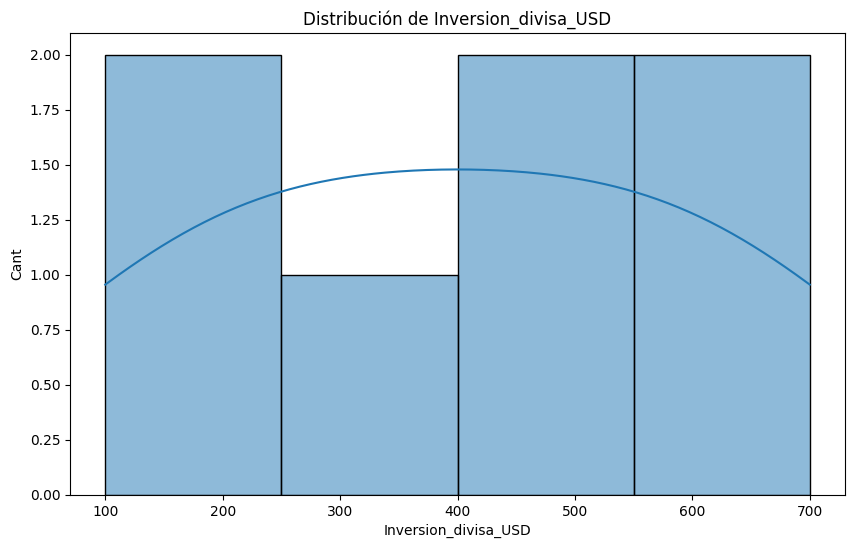

In [ ]:
# Histograma y gráfica de densidad
plt.figure(figsize=(10, 6))
sns.histplot(df['Inversion_divisa_USD'], kde=True)
plt.title('Distribución de Inversion_divisa_USD')
plt.xlabel('Inversion_divisa_USD')
plt.ylabel('Cant')
plt.show()

En este gràfico podremos ver que la mayor parte de las inversiones provienen de los productores Argentinos.

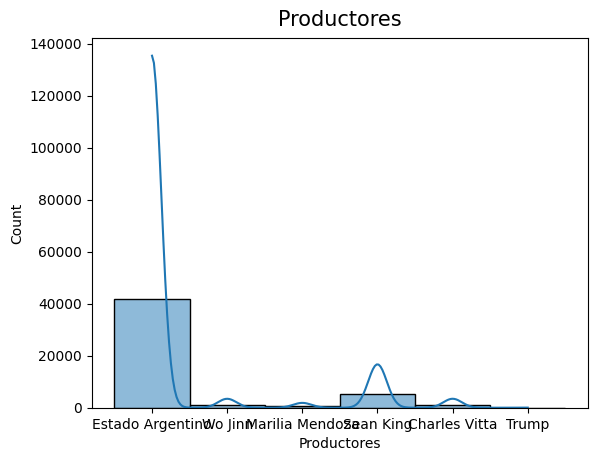

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data Science-TP/Estimaciones Agricolas TPDATASCI.xlsx')
if "Productor_nombre" in df.columns:
    sns.histplot(data=df, x="Productor_nombre", kde=True)
    plt.title("Productores", fontsize=15, verticalalignment='bottom')
    plt.xlabel("Productores", fontsize=10)
    plt.show()
else:
    print("Error")


**EDA**

En Este analisis podremos ver el top 10 de cultivos más utilizados en las localidades que han resultado más fructìferas.
Posterior veremos las variables de las superficies cosechadas y sembradas, como referencia para la futura toma de decisiones.
 En base a esto, detectamos què localidad rinde más para cierto cultivo. Con este resultado se podrà trabajar en más inversiones para la zona.

<function matplotlib.pyplot.show(close=None, block=None)>

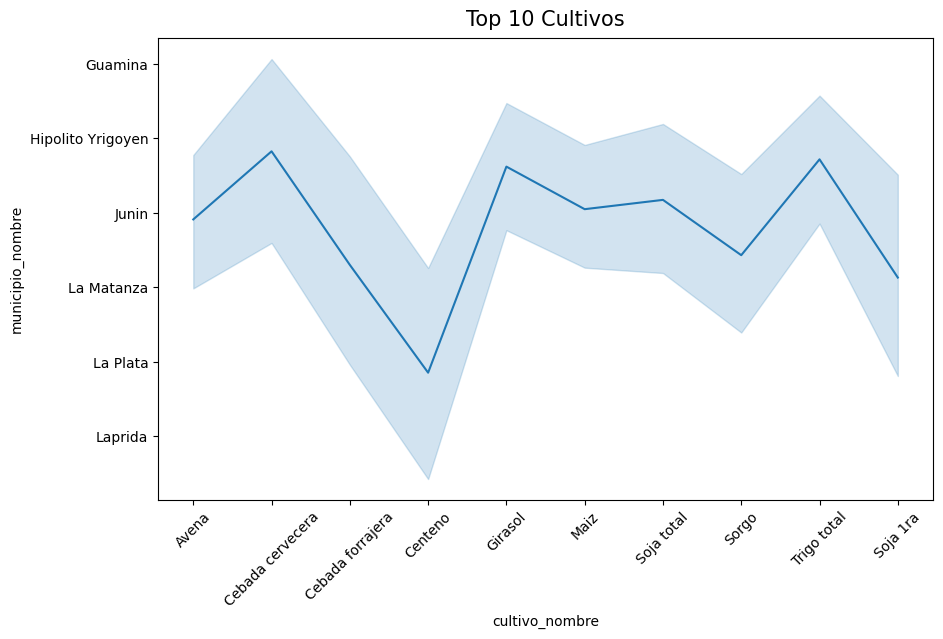

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data Science-TP/Estimaciones Agricolas TPDATASCI.xlsx')
top_10_cultivos = df['cultivo_nombre'].value_counts().head(10)
top_5_municipio = df['municipio_nombre'].value_counts().head(10)
df_top_10 = df[df['cultivo_nombre'].isin(top_10_cultivos.index)]
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'cultivo_nombre', y = 'municipio_nombre', data=df_top_10 )
plt.title("Top 10 Cultivos", fontsize=15, verticalalignment='bottom')
plt.xticks (rotation=45)
plt.show

In [ ]:
import pandas as pd
proy = pd.read_excel('/content/drive/MyDrive/Data Science-TP/Estimaciones Agricolas TPDATASCI.xlsx')
X_pf = proy.drop('roi_porcent', axis=1)
y_pf = proy['roi_porcent']
numeric_columns = X_pf.select_dtypes(include=['number']).columns
X_pf_numeric = X_pf[numeric_columns]
correlation_matrix = X_pf_numeric.corr() # Calculamos la correlacion con columnas numericas
print(correlation_matrix)

                         superficie_sembrada   superficie_cosechada  \
superficie_sembrada                  1.000000              0.980830   
superficie_cosechada                 0.980830              1.000000   
Inversion_divisa USD                 0.057493              0.053140   
produccion en toneladas              0.847562              0.867447   
latitud                             -0.087421             -0.074650   
longitud                            -0.169022             -0.143377   

                         Inversion_divisa USD  produccion en toneladas  \
superficie_sembrada                  0.057493                 0.847562   
superficie_cosechada                 0.053140                 0.867447   
Inversion_divisa USD                 1.000000                 0.018062   
produccion en toneladas              0.018062                 1.000000   
latitud                             -0.147413                -0.006920   
longitud                            -0.041991             

In [ ]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as mticker


In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
df.describe()

,superficie_sembrada,superficie_cosechada,Inversion_divisa USD,produccion en toneladas,roi_porcent,latitud,longitud,year_fecha
count,49830.000000,49830.000000,49830.000000,4.983000e+04,49830.000000,49830.000000,49830.000000,49830
mean,12680.986695,11229.157977,858.745306,3.206822e+04,0.088553,-35.671814,-60.082372,2020-07-25 07:00:52.450330880
min,0.000000,0.000000,79.908676,0.000000e+00,-1.492850,-40.798400,-68.594700,2020-01-01 00:00:00
25%,500.000000,228.000000,79.908676,5.000000e+02,0.092857,-37.011900,-61.292600,2020-01-01 00:00:00
50%,2700.000000,1600.000000,79.908676,3.382500e+03,0.096515,-35.391800,-59.850400,2021-01-01 00:00:00
75%,12000.000000,9500.000000,79.908676,2.329600e+04,0.098000,-34.552400,-58.803400,2021-01-01 00:00:00
max,880000.000000,349600.000000,5000.000000,1.146880e+06,0.099963,-26.629200,-54.113300,2023-01-01 00:00:00
std,26192.646388,25053.162067,1795.638586,7.614743e+04,0.029818,1.927574,1.907464,NaN


In [ ]:
df.shape

(49830, 14)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data Science-TP/Estimaciones Agricolas TPDATASCI.xlsx')

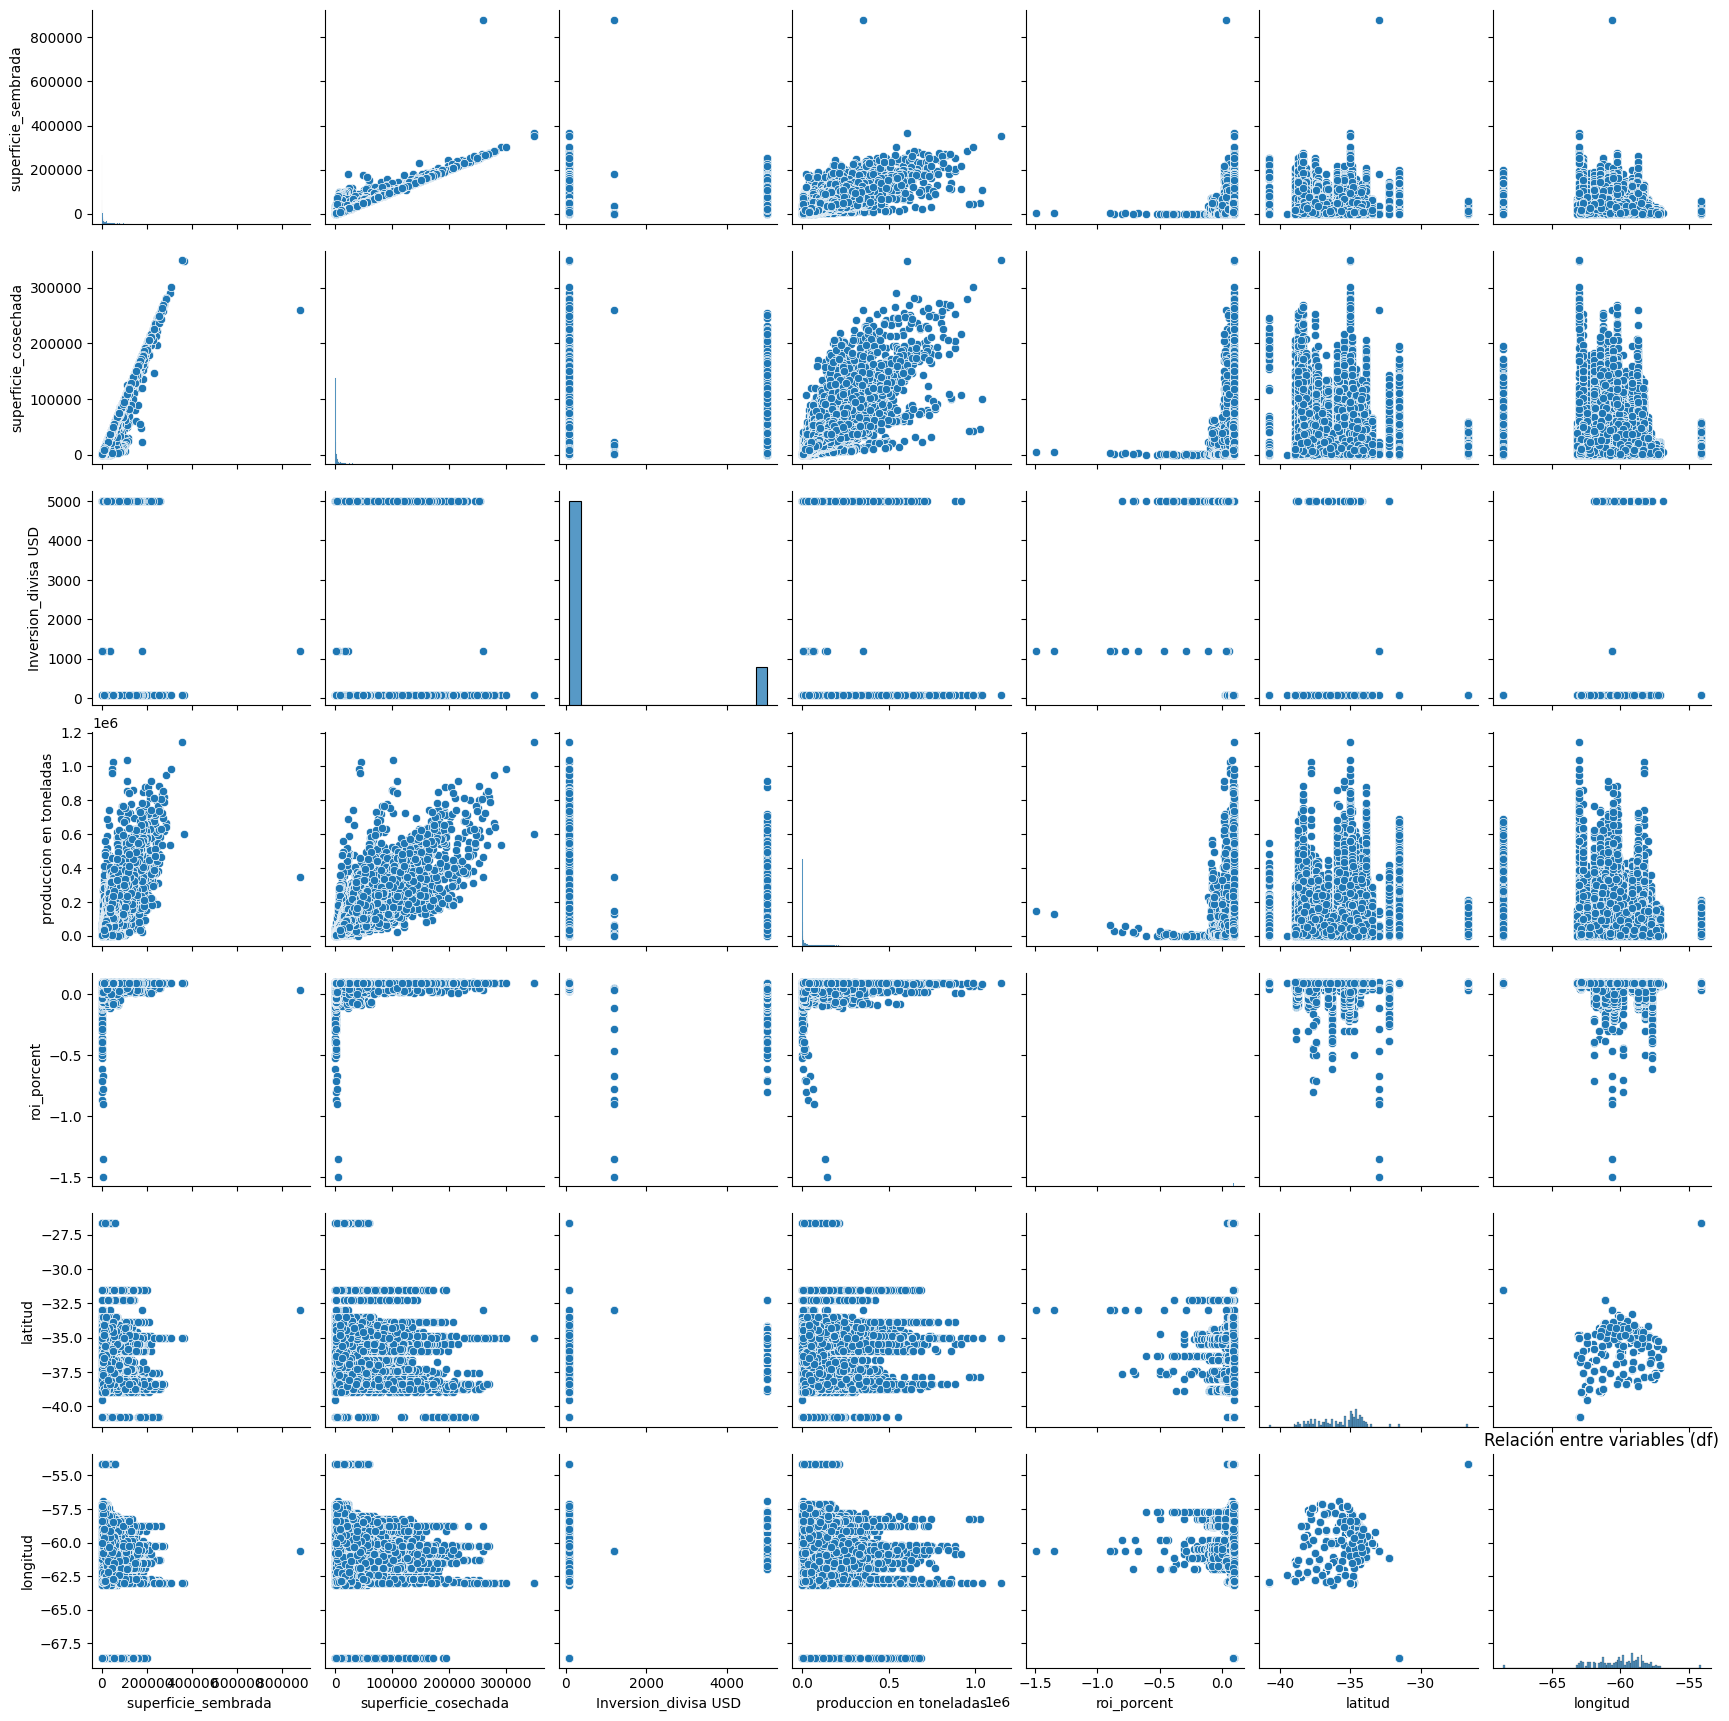

In [ ]:
sns.pairplot(df)
plt.title("Relación entre variables (df)")
plt.show()

In [ ]:
print(df.columns)

Index(['cultivo_nombre', 'municipio_nombre', 'superficie_sembrada ',
       'superficie_cosechada', 'Origen_Empresa', 'Productor_nombre',
       'Inversion_moneda', 'Inversion_divisa USD', 'produccion en toneladas',
       ' rendimiento USD', 'roi_porcent', 'latitud', 'longitud', 'year_fecha'],
      dtype='object')


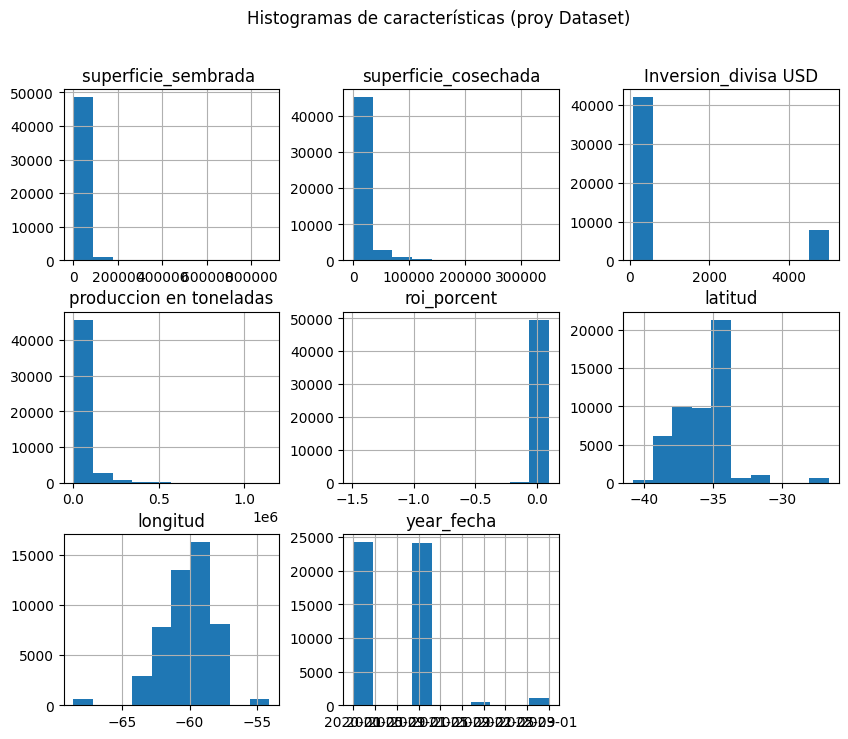

In [ ]:
# Histograma de características
proy.hist(figsize=(10, 8))
plt.suptitle("Histogramas de características (proy Dataset)")
delete = plt.show('year_fecha')
plt.show()

In [ ]:
roi_porcent = proy['roi_porcent'].values

np.histogram(roi_porcent)

(array([    2,     0,     0,     2,     4,     2,    16,    24,   254,
        49526]),
 array([-1.49285   , -1.33356871, -1.17428743, -1.01500614, -0.85572486,
        -0.69644357, -0.53716229, -0.377881  , -0.21859971, -0.05931843,
         0.09996286]))

Limpiamos nuestro dataset para los datos vacios.

---
Imprimimos un ejemplo de solo 10 filas para tener una visualizaciòn clara.


In [ ]:
proy.dropna()
proy.head(10)

,cultivo_nombre,municipio_nombre,superficie_sembrada,superficie_cosechada,Origen_Empresa,Productor_nombre,Inversion_moneda,Inversion_divisa USD,produccion en toneladas,rendimiento USD,roi_porcent,latitud,longitud,year_fecha
0,Ajo,25 de Mayo,3,3,Local,Estado Argentino,ARS,79.908676,10,3333,0.095239,-35.4432,-60.1721,2020-01-01
1,Ajo,Adolfo Gonzales Chaves,15,15,Extranjera,Wo Jinn,USD,5000.000000,82,5467,0.010000,-38.0481,-60.0744,2020-01-01
2,Ajo,Alberti,5,5,Extranjera,Wo Jinn,USD,5000.000000,7,1400,0.072000,-35.0279,-60.2851,2020-01-01
3,Ajo,Almirante Brown,2,2,Local,Estado Argentino,ARS,79.908676,8,4000,0.094286,-34.8116,-58.2619,2020-01-01
4,Ajo,Arrecifes,6,6,Local,Estado Argentino,ARS,79.908676,15,2500,0.096429,-34.0587,-60.1195,2020-01-01
5,Ajo,Ayacucho,5,5,Local,Estado Argentino,ARS,79.908676,14,2800,0.096000,-37.1516,-58.4832,2020-01-01
6,Ajo,Bahia Blanca,10,10,Local,Estado Argentino,ARS,79.908676,40,4000,0.094286,-38.7183,-62.2620,2020-01-01
7,Ajo,Balcarce,450,450,Local,Estado Argentino,ARS,79.908676,2025,4500,0.093571,-37.8397,-58.2576,2020-01-01
8,Ajo,Baradero,5,5,Local,Estado Argentino,ARS,79.908676,20,4000,0.094286,-33.8087,-59.5094,2020-01-01
9,Ajo,Benito Juarez,5,5,Extranjera,Marilia Mendoza,USD,5000.000000,22,4400,0.012000,-37.6690,-59.8039,2020-01-01


#Agrupaciòn de dataset
Aqui veremos un listado de cuantos cultivos se utilizan en cada Municipio

In [ ]:
proy['municipio_nombre'].value_counts(dropna=False)



,count
municipio_nombre,
Baradero,633
San Pedro,630
San NicolÃ¡s,628
Coronel Suarez,625
Balcarce,616
...,...
Tres de Febrero,1
BOLIVAR,1
Lanus,1


Metricas de Clasificaciòn

In [ ]:
from sklearn.linear_model import LinearRegression # Import LinearRegression instead
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_excel('/content/drive/MyDrive/Data Science-TP/Estimaciones Agricolas TPDATASCI.xlsx')

X = data[['roi_porcent']]
y = data['roi_porcent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadratico medio: {mse}")
print(f"R-cuadratico: {r2}")

Error cuadratico medio: 1.6206271459193844e-34
R-cuadratico: 1.0
